In [1]:
import sys
import os


sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
print(sys.path[-1])

/home/cotsios/dsit/2nd-semester/algos-in-mol-bio/py-dali


In [2]:
from src.utils import quick_load
from src.monte_carlo import MonteCarloAligner

In [3]:
BASE_DIR = os.path.dirname(os.getcwd())
print(BASE_DIR)

QUERY_DIR = os.path.join(BASE_DIR, "data_reduced", "d3jbra3")
print(QUERY_DIR)

/home/cotsios/dsit/2nd-semester/algos-in-mol-bio/py-dali
/home/cotsios/dsit/2nd-semester/algos-in-mol-bio/py-dali/data_reduced/d3jbra3


### Inspection on these specific structures

|  id       | score | relationship |
|-----------|-------|--------------|
| `d3jbra3` | 418   | query        |
| `d6mwdb1` | 263   | family       |
| `d6vwxa_` | 250   | superfamily  |
| `d3kg2a3` | 183   | fold         |
| `d3ar4a1` | 162   | class        |
| `d3cu7ad` | 100   | other        |

In [4]:
d3jbra3 = quick_load(os.path.join(
    QUERY_DIR,
    "d3jbra3.pkl.gz"
))
d6mwdb1 = quick_load(os.path.join(
    QUERY_DIR,
    "references",
    "d6mwdb1.pkl.gz"
))
d6vwxa_ = quick_load(os.path.join(
    QUERY_DIR,
    "references",
    "d6vwxa_.pkl.gz"
))
d3kg2a3 = quick_load(os.path.join(
    QUERY_DIR,
    "references",
    "d3kg2a3.pkl.gz"
))
d3ar4a1 = quick_load(os.path.join(
    QUERY_DIR,
    "references",
    "d3ar4a1.pkl.gz"
))
d3cu7ad = quick_load(os.path.join(
    QUERY_DIR,
    "references",
    "d3cu7ad.pkl.gz"
))

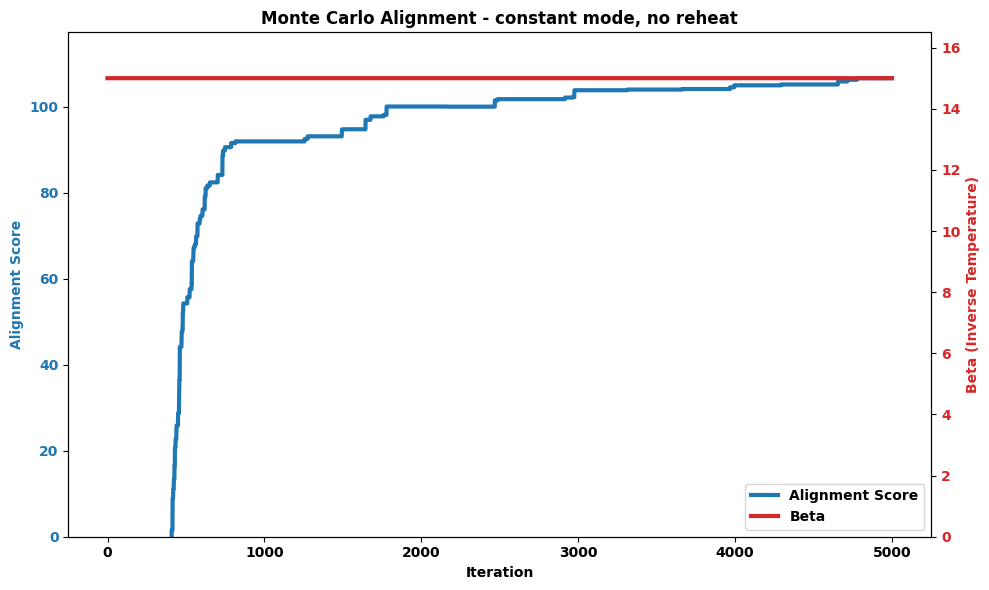

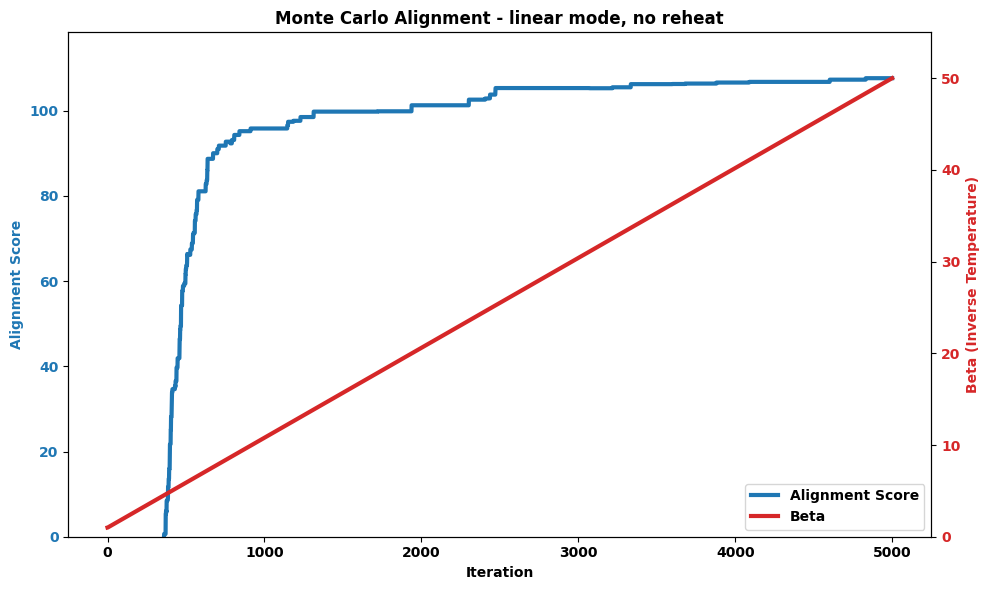

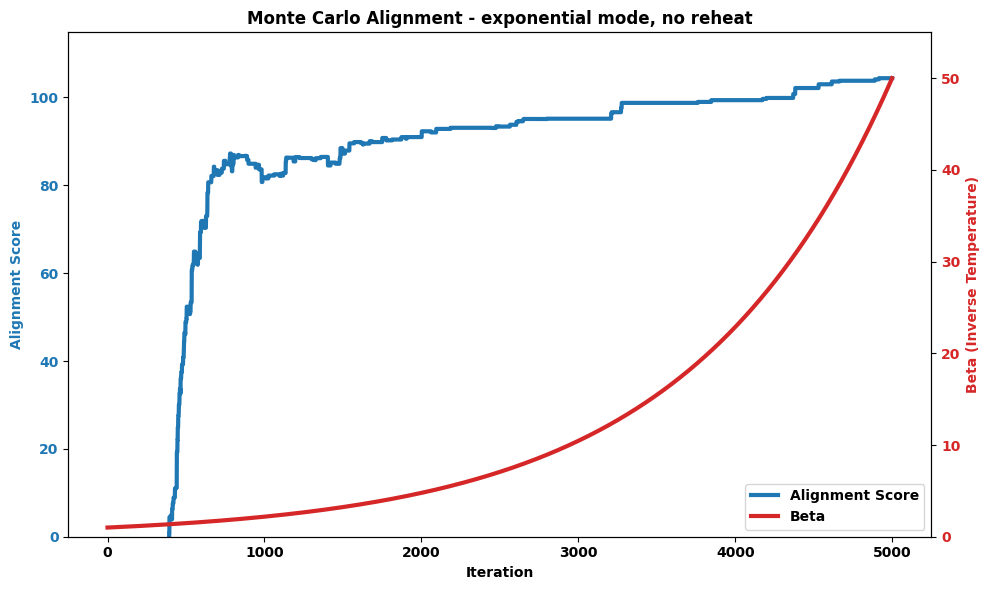

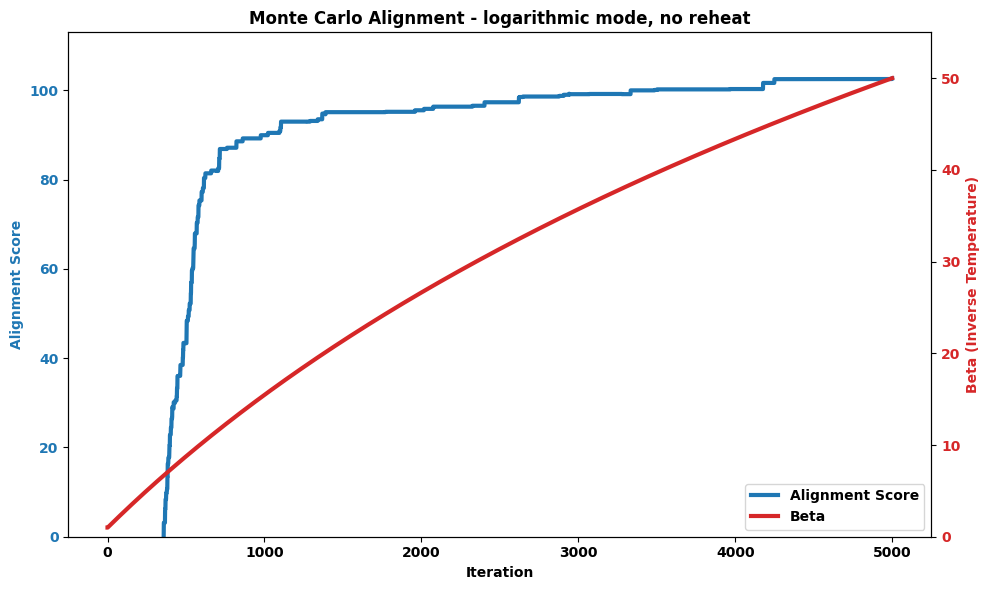

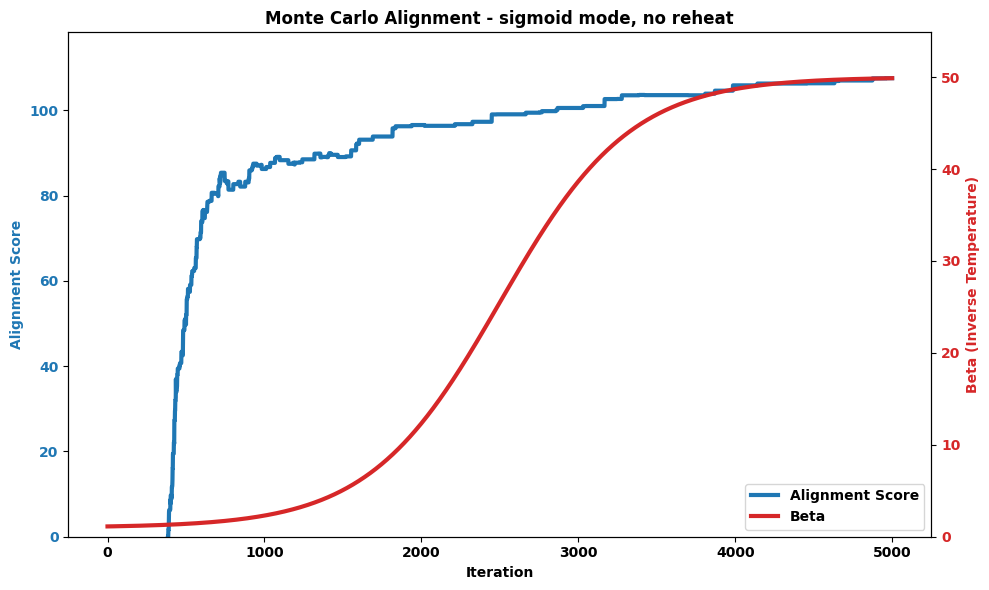

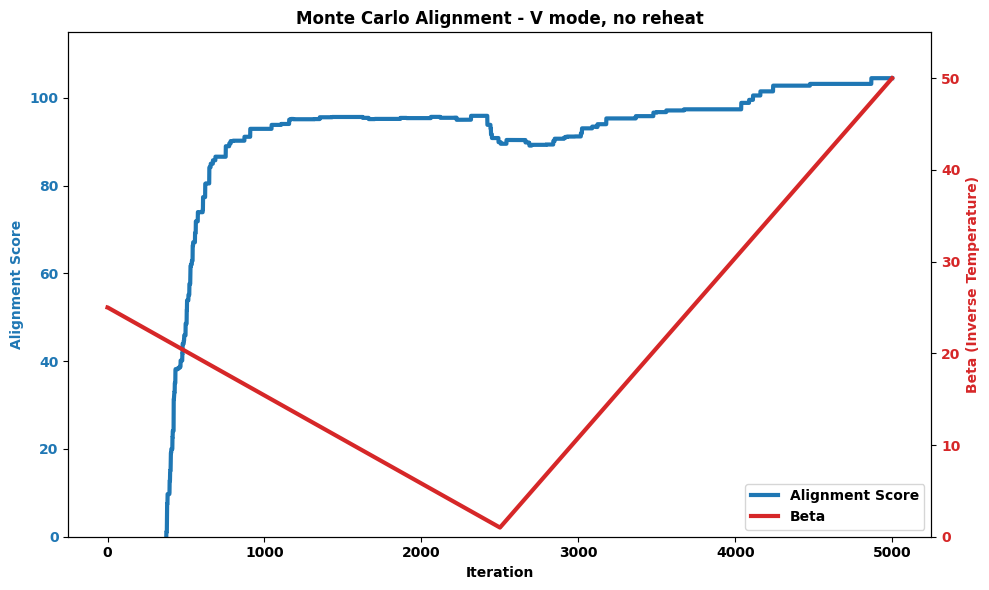

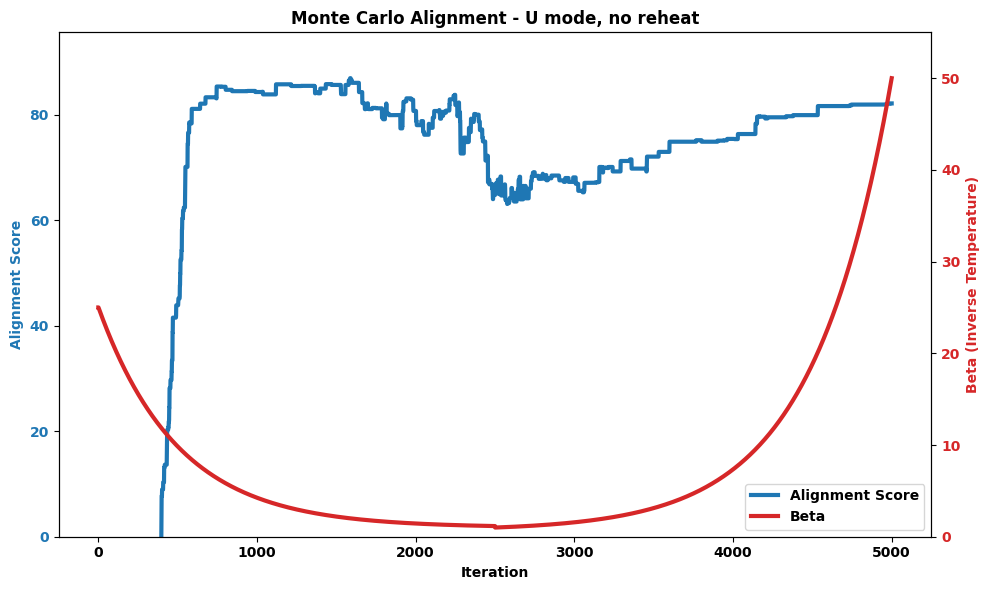

In [5]:
modes = [
    "constant",
    "linear",
    "exponential",
    "logarithmic",
    "sigmoid",
    "V",
    "U"
]
ranges = [
    15.0,  # constant
    (1.0, 50.0),  # linear: start, end
    (1.0, 50.0),  # exponential: start, end
    (1.0, 50.0),  # logarithmic: start, end
    (1.0, 50.0, 1.0, 0.5),  # sigmoid: start, end, steepness, center_position
    (1.0, 25.0, 50.0, 0.5),  # V: min, start, end, center_position
    (1.0, 25.0, 50.0, 0.5, 5.0, 5.0)  # U: min, start, end, center_position, decay_rate, growth_rate
]

for m, r in zip(modes, ranges):
    aligner = MonteCarloAligner(
        contact_patterns_A=d3jbra3,
        contact_patterns_B=d3cu7ad,
        iteration_limit=5_000,
        betas_mode=m,
        betas_range=r,
        reheat=False
    )
    _ = aligner.run_simulation(verbose=False)
    aligner.plot_convergence(title=f"Monte Carlo Alignment - {m} mode, no reheat")

In [6]:
query = d3jbra3
references = {
    "query": query,
    "d6mwdb1": d6mwdb1,
    "d6vwxa_": d6vwxa_,
    "d3kg2a3": d3kg2a3,
    "d3ar4a1": d3ar4a1,
    "d3cu7ad": d3cu7ad
}

Alignment against query


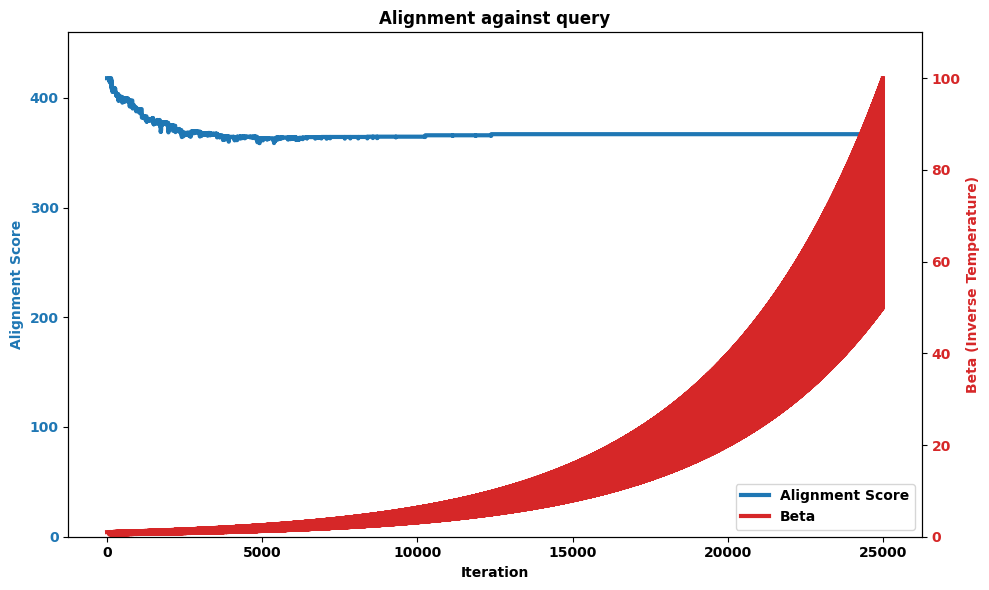


Alignment against d6mwdb1


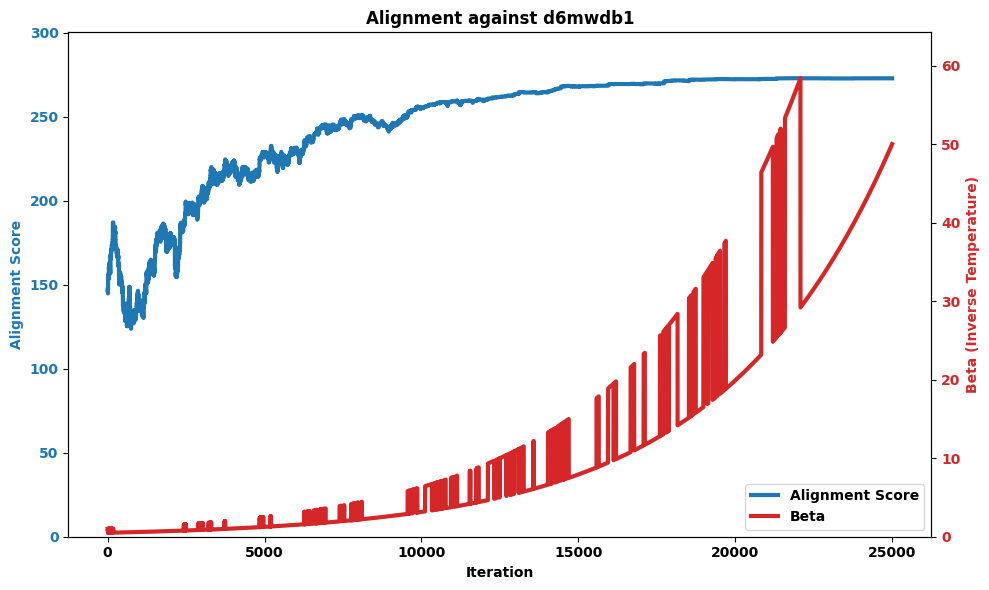


Alignment against d6vwxa_


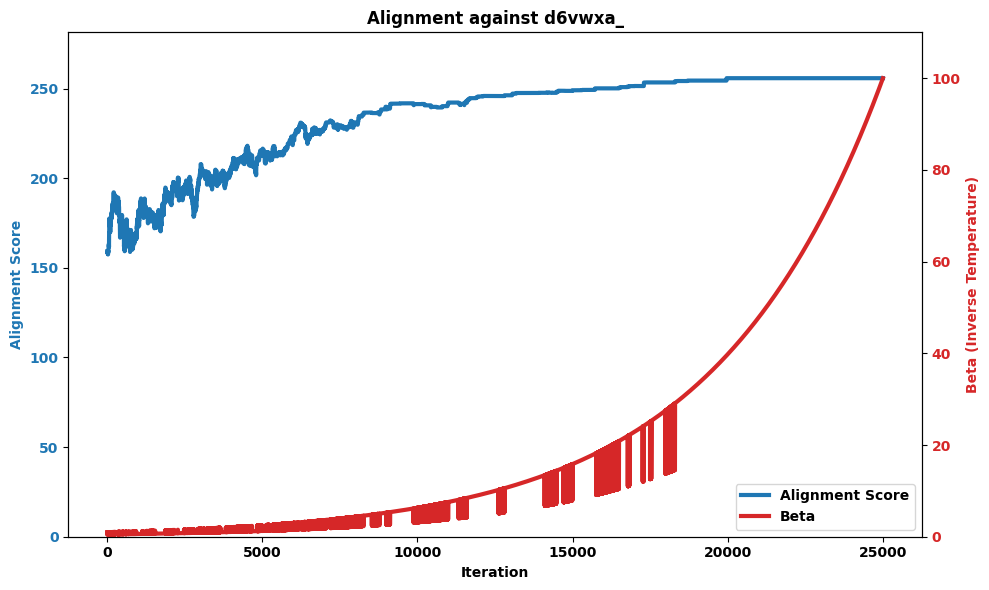


Alignment against d3kg2a3


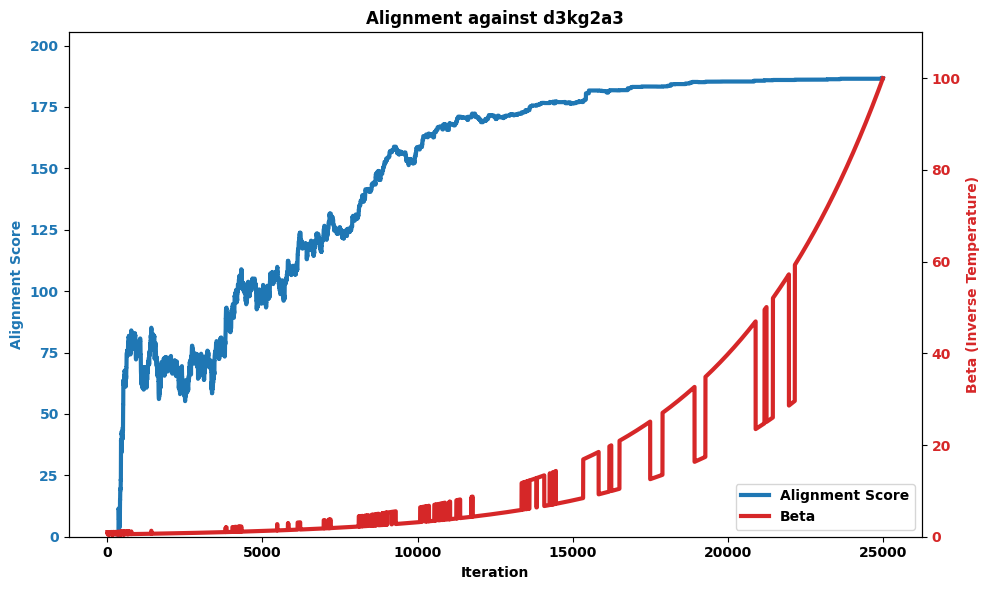


Alignment against d3ar4a1


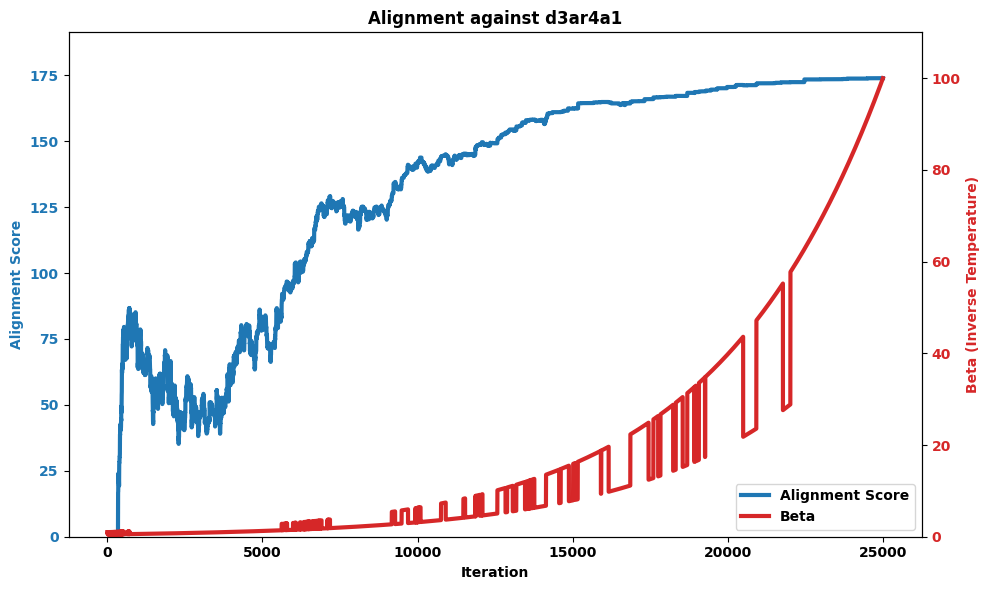


Alignment against d3cu7ad


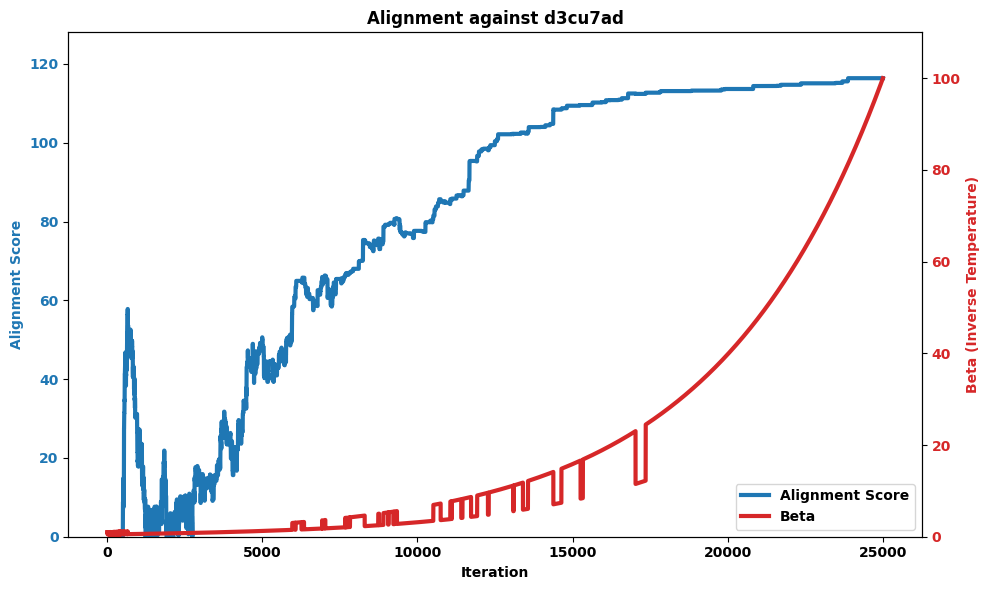

In [8]:
results = {}
for ref, ref_cp in references.items():
    print(f"Alignment against {ref}")
    print("=" * 25)
    aligner = MonteCarloAligner(
        contact_patterns_A=query,
        contact_patterns_B=ref_cp,
        iteration_limit=25_000,
        betas_mode="exponential",
        betas_range=(1.0, 100.0),
        reheat=True
    )
    best_al, best_al_score, hist = aligner.run_simulation(verbose=True)
    aligner.plot_convergence(
        title=f"Alignment against {ref}",
        show=True
    )
    results[ref] = {
        "alignment": best_al,
        "score": best_al_score,
        "history": hist
    }
    print("=" * 25)
    print()

In [71]:
for k, v in results.items():
    print(k)
    al = v["alignment"]
    scores = al._score_cache
    pairs = sorted(scores.keys(), key=lambda x: scores[x], reverse=True)[:5]
    pairs = [(int(x), int(y)) for x, y in pairs]
    print(f"Best pairs: {pairs}")
    for pair in pairs:
        print(f"Pair: {pair}")
        q = references["query"][pair[0]][1]
        r = references[k][pair[1]][1]
        print(f"Query coords:\n{q}")
        print(f"Reference coords:\n{r}")
        print()

    print("=" * 25)
    print()

query
Best pairs: [(11, 11), (15, 15), (6, 6), (3, 3), (0, 0)]
Pair: (11, 11)
Query coords:
[[244 250]
 [245 251]
 [246 252]
 [247 253]
 [248 254]
 [249 255]]
Reference coords:
[[244 250]
 [245 251]
 [246 252]
 [247 253]
 [248 254]
 [249 255]]

Pair: (15, 15)
Query coords:
[[250 256]
 [251 257]
 [252 258]
 [253 259]
 [254 260]
 [255 261]]
Reference coords:
[[250 256]
 [251 257]
 [252 258]
 [253 259]
 [254 260]
 [255 261]]

Pair: (6, 6)
Query coords:
[[143 149]
 [144 150]
 [145 151]
 [146 152]
 [147 153]
 [148 154]]
Reference coords:
[[143 149]
 [144 150]
 [145 151]
 [146 152]
 [147 153]
 [148 154]]

Pair: (3, 3)
Query coords:
[[235 241]
 [236 242]
 [237 243]
 [238 244]
 [239 245]
 [240 246]
 [241 247]
 [242 248]
 [243 249]]
Reference coords:
[[235 241]
 [236 242]
 [237 243]
 [238 244]
 [239 245]
 [240 246]
 [241 247]
 [242 248]
 [243 249]]

Pair: (0, 0)
Query coords:
[[48 54]
 [49 55]
 [50 56]
 [51 57]
 [52 58]
 [53 59]]
Reference coords:
[[48 54]
 [49 55]
 [50 56]
 [51 57]
 [52 58]
 [

In [73]:
def print_results_compact(results, references):
    for k, v in results.items():
        print(f"{k}")
        print("-" * 40)
        
        al = v["alignment"]
        scores = al._score_cache
        pairs = sorted(scores.keys(), key=lambda x: scores[x], reverse=True)[:5]
        pairs = [(int(x), int(y)) for x, y in pairs]
        
        print(f"Top 5 pairs: {pairs}\n")
        
        for i, pair in enumerate(pairs, 1):
            q = references["query"][pair[0]][1]
            r = references[k][pair[1]][1]
            
            print(f"#{i} Pair {pair} (score: {scores[pair]:.3f})")
            print(f"  Query:     {q.tolist()}")
            print(f"  Reference: {r.tolist()}")
            print()
        
        print("=" * 50)
        print()

print_results_compact(results, references)

query
----------------------------------------
Top 5 pairs: [(11, 11), (15, 15), (6, 6), (3, 3), (0, 0)]

#1 Pair (11, 11) (score: 6.010)
  Query:     [[244, 250], [245, 251], [246, 252], [247, 253], [248, 254], [249, 255]]
  Reference: [[244, 250], [245, 251], [246, 252], [247, 253], [248, 254], [249, 255]]

#2 Pair (15, 15) (score: 5.980)
  Query:     [[250, 256], [251, 257], [252, 258], [253, 259], [254, 260], [255, 261]]
  Reference: [[250, 256], [251, 257], [252, 258], [253, 259], [254, 260], [255, 261]]

#3 Pair (6, 6) (score: 5.968)
  Query:     [[143, 149], [144, 150], [145, 151], [146, 152], [147, 153], [148, 154]]
  Reference: [[143, 149], [144, 150], [145, 151], [146, 152], [147, 153], [148, 154]]

#4 Pair (3, 3) (score: 5.922)
  Query:     [[235, 241], [236, 242], [237, 243], [238, 244], [239, 245], [240, 246], [241, 247], [242, 248], [243, 249]]
  Reference: [[235, 241], [236, 242], [237, 243], [238, 244], [239, 245], [240, 246], [241, 247], [242, 248], [243, 249]]

#5 Pai